In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#Load Dataset
dataset = pd.read_csv("df_features.csv")


dataset.head()

C:\Users\Logang 4 Lyfe\AppData\Local\Temp\ipykernel_23640\4079740252.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,file_name,signal_mean,signal_std,signal_skew,signal_kurtosis,zcr_mean,zcr_std,rms_mean,rms_std,tempo,...,chroma_stft_3_std,chroma_stft_4_std,chroma_stft_5_std,chroma_stft_6_std,chroma_stft_7_std,chroma_stft_8_std,chroma_stft_9_std,chroma_stft_10_std,chroma_stft_11_std,chroma_stft_12_std
0,ACDC - ACDC - Back In Black (Official 4K Video...,0.151,0.206,1.646,1.673,0.165,0.050,0.194,0.069,92.285,...,0.312,0.274,0.299,0.289,0.283,0.271,0.247,0.278,0.276,0.302
1,ACDC - ACDC - Hells Bells (Official 4K Video) ...,0.176,0.225,1.258,0.491,0.114,0.035,0.220,0.047,103.359,...,0.279,0.171,0.294,0.176,0.238,0.312,0.180,0.297,0.160,0.203
2,ACDC - ACDC - Highway to Hell (Live At River P...,0.136,0.178,1.576,1.259,0.152,0.052,0.172,0.045,123.047,...,0.282,0.298,0.260,0.317,0.309,0.267,0.326,0.284,0.294,0.316
3,ACDC - ACDC - It's a Long Way to the Top (If Y...,0.190,0.244,1.210,0.416,0.136,0.049,0.238,0.053,135.999,...,0.274,0.293,0.244,0.263,0.206,0.223,0.273,0.220,0.291,0.199
4,ACDC - ACDC - Moneytalks (Official HD Video) -...,0.194,0.251,1.330,0.665,0.120,0.042,0.244,0.059,123.047,...,0.270,0.233,0.263,0.220,0.226,0.287,0.223,0.256,0.224,0.240


In [2]:
#Define genres
genres = ['HardcorePunk', 'Punk Rock', 'Metalcore', 'Grunge', 'Emo', 'Pop Punk', 'Hard Rock', 'Heavy Metal', 'Alternative Rock', 'Thrash Metal']

#Assign labels for each genre
genre_to_label = {genre: i for i, genre in enumerate(genres)}

#Extract genre from title and map to label
def extract_genre_label(title):
    for genre in genres:
        if genre in title:
            return genre_to_label[genre]
    return None #In case no genre matches

#Apply the function to extract genre labels 
dataset['Genre_Label'] = dataset['file_name'].apply(extract_genre_label)

print(dataset)

print("Genre to Label Mapping:")
print(genre_to_label)
dataset.head()

                                             file_name  signal_mean  \
0    ACDC - ACDC - Back In Black (Official 4K Video...        0.151   
1    ACDC - ACDC - Hells Bells (Official 4K Video) ...        0.176   
2    ACDC - ACDC - Highway to Hell (Live At River P...        0.136   
3    ACDC - ACDC - It's a Long Way to the Top (If Y...        0.190   
4    ACDC - ACDC - Moneytalks (Official HD Video) -...        0.194   
..                                                 ...          ...   
995  Wage War - Wage War - The River (Official Musi...        0.229   
996  Wage War - Wage War - Who I Am (Official Music...        0.291   
997  Wonderful - Circle Jerks - HardcorePunk - clip...        0.145   
998  World up My Ass - Circle Jerks - HardcorePunk ...        0.199   
999  Wound Up - Black Flag - HardcorePunk - clipped...        0.076   

     signal_std  signal_skew  signal_kurtosis  zcr_mean  zcr_std  rms_mean  \
0         0.206        1.646            1.673     0.165    0.050     

,file_name,signal_mean,signal_std,signal_skew,signal_kurtosis,zcr_mean,zcr_std,rms_mean,rms_std,tempo,...,chroma_stft_4_std,chroma_stft_5_std,chroma_stft_6_std,chroma_stft_7_std,chroma_stft_8_std,chroma_stft_9_std,chroma_stft_10_std,chroma_stft_11_std,chroma_stft_12_std,Genre_Label
0,ACDC - ACDC - Back In Black (Official 4K Video...,0.151,0.206,1.646,1.673,0.165,0.050,0.194,0.069,92.285,...,0.274,0.299,0.289,0.283,0.271,0.247,0.278,0.276,0.302,6
1,ACDC - ACDC - Hells Bells (Official 4K Video) ...,0.176,0.225,1.258,0.491,0.114,0.035,0.220,0.047,103.359,...,0.171,0.294,0.176,0.238,0.312,0.180,0.297,0.160,0.203,6
2,ACDC - ACDC - Highway to Hell (Live At River P...,0.136,0.178,1.576,1.259,0.152,0.052,0.172,0.045,123.047,...,0.298,0.260,0.317,0.309,0.267,0.326,0.284,0.294,0.316,6
3,ACDC - ACDC - It's a Long Way to the Top (If Y...,0.190,0.244,1.210,0.416,0.136,0.049,0.238,0.053,135.999,...,0.293,0.244,0.263,0.206,0.223,0.273,0.220,0.291,0.199,6
4,ACDC - ACDC - Moneytalks (Official HD Video) -...,0.194,0.251,1.330,0.665,0.120,0.042,0.244,0.059,123.047,...,0.233,0.263,0.220,0.226,0.287,0.223,0.256,0.224,0.240,6


In [3]:
import pandas as pd

# Assuming your dataset is already loaded into `data`
# The dataset contains a column 'Genre_Label' with numerical genre labels

# Define the mapping of labels to genre names
genre_mapping = {0: 'HardcorePunk', 1: 'Punk Rock', 2: 'Metalcore', 3: 'Grunge', 4: 'Emo', 
                 5: 'Pop Punk', 6: 'Hard Rock', 7: 'Heavy Metal', 8: 'Alternative Rock', 9: 'Thrash Metal'}

# Map the numerical genre label to genre names
dataset['Genre_Name'] = dataset['Genre_Label'].map(genre_mapping)

# Verify the updated DataFrame
print(dataset.head())


                                           file_name  signal_mean  signal_std  \
0  ACDC - ACDC - Back In Black (Official 4K Video...        0.151       0.206   
1  ACDC - ACDC - Hells Bells (Official 4K Video) ...        0.176       0.225   
2  ACDC - ACDC - Highway to Hell (Live At River P...        0.136       0.178   
3  ACDC - ACDC - It's a Long Way to the Top (If Y...        0.190       0.244   
4  ACDC - ACDC - Moneytalks (Official HD Video) -...        0.194       0.251   

   signal_skew  signal_kurtosis  zcr_mean  zcr_std  rms_mean  rms_std  \
0        1.646            1.673     0.165    0.050     0.194    0.069   
1        1.258            0.491     0.114    0.035     0.220    0.047   
2        1.576            1.259     0.152    0.052     0.172    0.045   
3        1.210            0.416     0.136    0.049     0.238    0.053   
4        1.330            0.665     0.120    0.042     0.244    0.059   

     tempo  ...  chroma_stft_5_std  chroma_stft_6_std  chroma_stft_7_std  

In [4]:

from sklearn.preprocessing import MinMaxScaler
#Exclude categorical and label columns from normalization
features = dataset.drop(['file_name', 'Genre_Label', 'Genre_Name'], axis=1)

#Standardize features
#scaler = StandardScaler()
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

#Create a new DataFrame with normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

#Combine normalized features with the genre label
final_df = pd.concat([normalized_df, dataset['Genre_Name']], axis=1)


In [5]:
# Check if the Genre_Label column exists
if 'Genre_Name' in final_df.columns:
    # Get the counts for each genre label
    genre_label_sums = final_df['Genre_Name'].value_counts()

    # Optionally sort by label if needed
    genre_label_sums = genre_label_sums.sort_index()

    print("Counts for each Genre Label:")
    print(genre_label_sums)
else:
    print("The 'Genre_Label' column does not exist in the dataset.")


Counts for each Genre Label:
Genre_Name
Alternative Rock    100
Emo                 100
Grunge              100
Hard Rock           100
HardcorePunk        100
Heavy Metal         100
Metalcore           100
Pop Punk            100
Punk Rock           100
Thrash Metal        100
Name: count, dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

# Assuming your dataset is in 'data'
# Encode the Genre column
le = LabelEncoder()
final_df['Genre_Label'] = le.fit_transform(final_df['Genre_Name'])

# Features and target
X = final_df.drop(['Genre_Name', 'Genre_Label'], axis=1)
y = final_df['Genre_Label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

#Stratified K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train logistic regression model
lr_model = LogisticRegression(max_iter=1000, multi_class='ovr', penalty='l2', random_state=42)
lr_scores = cross_val_score(lr_model, X_scaled_df, y, cv=cv, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy Scores:", lr_scores)
print("Logistic Regression Mean Accuracy:", lr_scores.mean())

#Cross-validation predictions
y_lr_pred = cross_val_predict(lr_model, X_scaled_df, y, cv=cv)

#Classification Report 
print("Logistic Regression Classification Report:")
print(classification_report(y, y_lr_pred))

#Confusion Matrix
cm_lr = confusion_matrix(y, y_lr_pred)
print("Logistic Regression Confusion Matrix:\n", cm_lr)

# Evaluate on validation set
#y_val_pred = model.predict(X_val)
#print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
#print(classification_report(y_val, y_val_pred, target_names=le.classes_))


Logistic Regression Cross-Validation Accuracy Scores: [0.365 0.44  0.435 0.47  0.42 ]
Logistic Regression Mean Accuracy: 0.426
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.35      0.35       100
           1       0.33      0.30      0.31       100
           2       0.44      0.42      0.43       100
           3       0.42      0.42      0.42       100
           4       0.40      0.38      0.39       100
           5       0.27      0.26      0.27       100
           6       0.69      0.75      0.72       100
           7       0.40      0.40      0.40       100
           8       0.37      0.40      0.39       100
           9       0.52      0.58      0.55       100

    accuracy                           0.43      1000
   macro avg       0.42      0.43      0.42      1000
weighted avg       0.42      0.43      0.42      1000

Logistic Regression Confusion Matrix:
 [[35 12  6 10  2 12  2  8 12  1]

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [8]:
#Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_split=5)

# Cross-validation scores
rf_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())

#Cross-validation predictions
y_rf_pred = cross_val_predict(rf_model, X, y, cv=cv)

#Classification report
print("Random Forest Classification Report:")
print(classification_report(y, y_rf_pred))

#Confusion matrix
cm_rf = confusion_matrix(y, y_rf_pred)
print("Random Forest Confusion Matrix:\n", cm_rf)

#feature_imp_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
#feature_imp_rf.nlargest(10).sort_values().plot(kind='barh', figsize=(10,6))
#plt.title("Top 10 Feature Importances (Random Forest)")
#plt.show()

Random Forest Cross-Validation Accuracy Scores: [0.45  0.495 0.47  0.485 0.47 ]
Random Forest Mean Accuracy: 0.47400000000000003
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.50      0.42       100
           1       0.56      0.28      0.37       100
           2       0.48      0.41      0.44       100
           3       0.38      0.49      0.43       100
           4       0.52      0.46      0.49       100
           5       0.24      0.11      0.15       100
           6       0.73      0.82      0.77       100
           7       0.47      0.51      0.49       100
           8       0.42      0.53      0.47       100
           9       0.53      0.63      0.57       100

    accuracy                           0.47      1000
   macro avg       0.47      0.47      0.46      1000
weighted avg       0.47      0.47      0.46      1000

Random Forest Confusion Matrix:
 [[50  6  6 13  3  2  1  7  9  3]
 [21 28  

In [9]:
#SVM with RBF Kernel
svm_model = SVC(kernel='rbf', C=1000.0, gamma='scale', probability=True, random_state=42)

#Cross validation scores
svm_scores = cross_val_score(svm_model, X_scaled_df, y, cv=cv, scoring='accuracy')
print("SVM Cross-Validation Accuracy Scores:", svm_scores)
print("SVM Mean Accuracy:", svm_scores.mean())

#Cross validation predictions
y_svm_pred = cross_val_predict(svm_model, X_scaled_df, y, cv=cv)

#Classification report 
print("SVM Classification Report:")
print(classification_report(y, y_svm_pred))

#Confusion matrix
cm_svm = confusion_matrix(y, y_svm_pred)
print("SVM Confusion Matrix:\n", cm_svm)

SVM Cross-Validation Accuracy Scores: [0.495 0.58  0.525 0.505 0.575]
SVM Mean Accuracy: 0.5359999999999999
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.49      0.43       100
           1       0.39      0.42      0.41       100
           2       0.49      0.54      0.51       100
           3       0.50      0.52      0.51       100
           4       0.50      0.51      0.50       100
           5       0.47      0.41      0.44       100
           6       0.86      0.82      0.84       100
           7       0.54      0.52      0.53       100
           8       0.58      0.47      0.52       100
           9       0.76      0.66      0.71       100

    accuracy                           0.54      1000
   macro avg       0.55      0.54      0.54      1000
weighted avg       0.55      0.54      0.54      1000

SVM Confusion Matrix:
 [[49 15 12  8  2  4  0  4  5  1]
 [20 42  4  3  5  6  0 11  7  2]
 [ 9  7 54  8  6 

In [10]:
#XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

#Cross-validation scores
xgb_scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy Scores:", xgb_scores)
print("XGBoost Mean Accuracy:", xgb_scores.mean())

#Cross-validation predictions
y_xgb_pred = cross_val_predict(xgb_model, X, y, cv=cv)

#Classification report
print("XGBoost Classification Report:")
print(classification_report(y, y_xgb_pred))

#Confusion matrix
cm_xgb = confusion_matrix(y, y_xgb_pred)
print("XGBoost Confusion Matrix:\n", cm_xgb)
#xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
#xgb_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,6))
#plt.title("Top 10 Feature Importances XGBoost")
#plt.show()

XGBoost Cross-Validation Accuracy Scores: [0.41  0.51  0.47  0.48  0.485]
XGBoost Mean Accuracy: 0.471
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       100
           1       0.42      0.32      0.36       100
           2       0.40      0.43      0.42       100
           3       0.45      0.48      0.47       100
           4       0.46      0.43      0.45       100
           5       0.25      0.20      0.22       100
           6       0.73      0.78      0.75       100
           7       0.48      0.47      0.48       100
           8       0.45      0.50      0.47       100
           9       0.57      0.64      0.60       100

    accuracy                           0.47      1000
   macro avg       0.46      0.47      0.47      1000
weighted avg       0.46      0.47      0.47      1000

XGBoost Confusion Matrix:
 [[46 10 11  8  1  6  1  5 10  2]
 [16 32  5  7  6 10  1  9 11  3]
 [10  4 43  6 

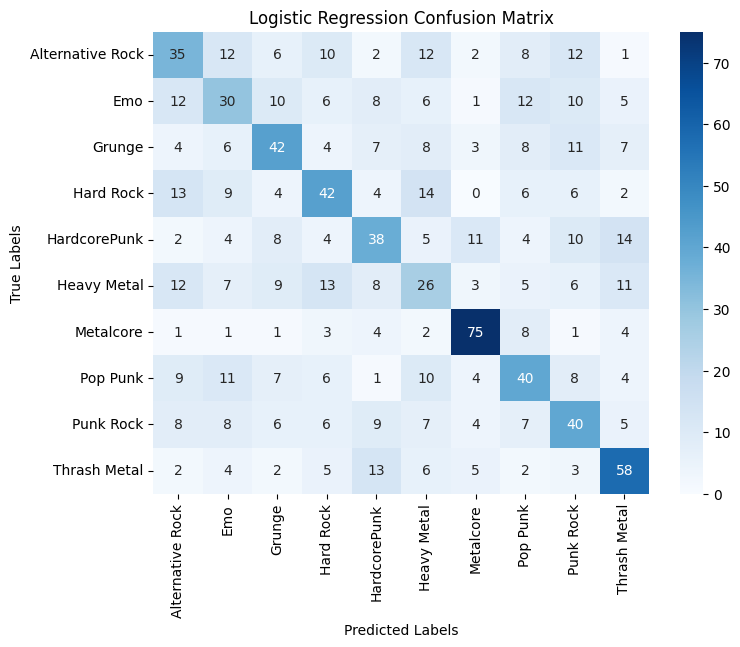

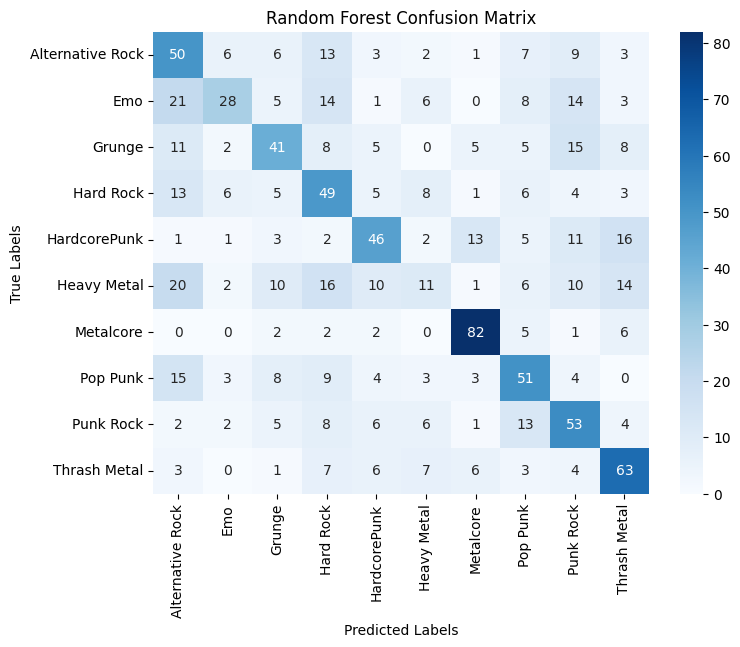

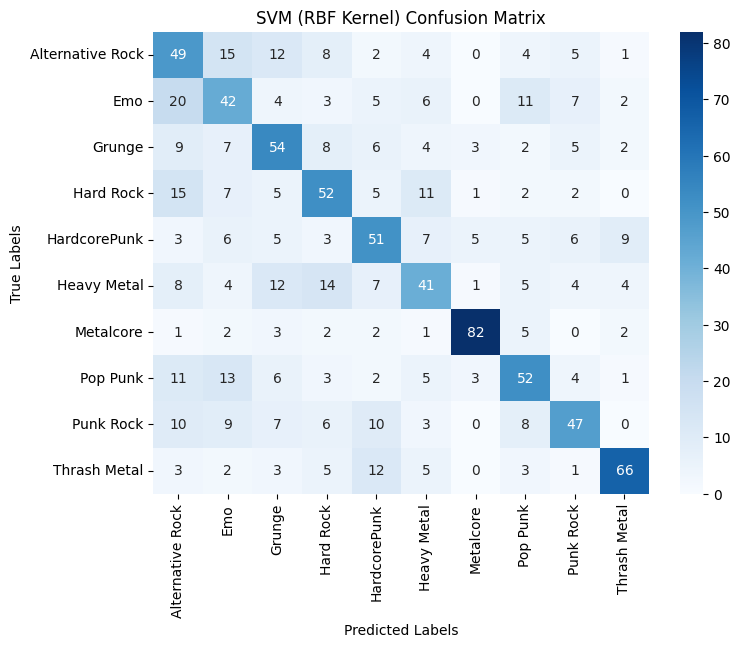

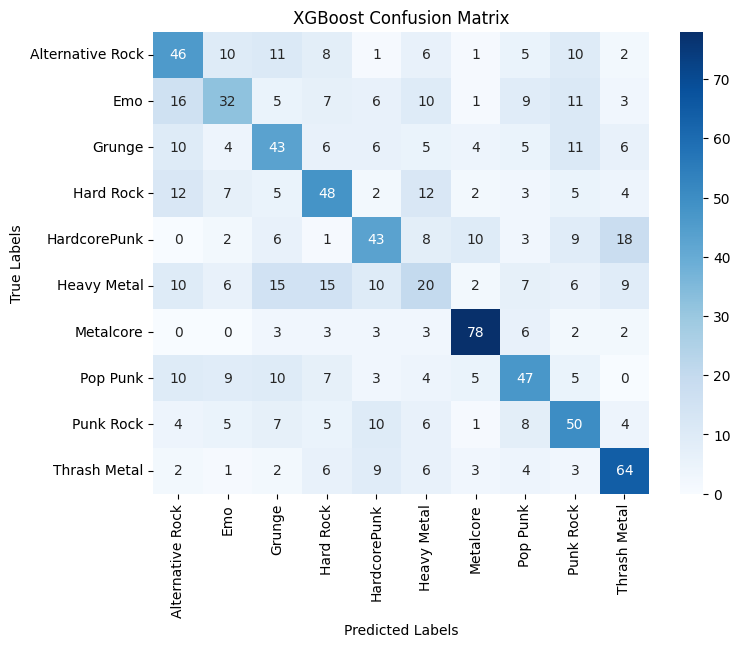

In [11]:
#Confusion Matrices for the models
import seaborn as sns

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_rf, "Random Forest")
plot_confusion_matrix(cm_svm, "SVM (RBF Kernel)")
plot_confusion_matrix(cm_xgb, "XGBoost")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#Parameter distribution for ElasticNet regularization
param_dist_elasticnet = {
    'C': uniform(loc=0.1, scale=10),
    'l1_ratio': uniform(loc=0, scale=1),
    'solver': ['saga'],
    'max_iter': [5000]
}

#Logistic Regression with ElasticNet
elasticnet_model = LogisticRegression(penalty='elasticnet', random_state=42)

#Randomized Search
rand_elasticnet = RandomizedSearchCV(
    elasticnet_model,
    param_distributions=param_dist_elasticnet,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42
)

#Fit to the data
rand_elasticnet.fit(X_scaled_df, y)

#Best hyperparameters and performance
print("Best hyperparameter for elasticnet logistic regression:", rand_elasticnet.best_params_)
print("Best Cross-Validation accuracy:", rand_elasticnet.best_score_)


In [12]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#Pipeline for Logistic Regression with PCA
pipeline_lr_pca = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'))
])

scores_lr_pca = cross_val_score(pipeline_lr_pca, X_scaled_df, y, cv=5, scoring='accuracy')
print(f"Logistic Regression with PCA Accuracy: {scores_lr_pca.mean():.3f}")

Logistic Regression with PCA Accuracy: 0.292


In [20]:
#Random Forest with hyperparameter tuning
param_dist_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Randomized Search for Random Forest
rand_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42
)
rand_rf.fit(X_scaled_df, y)

print("Best hyperparameters for Random Forest:", rand_rf.best_params_)
print("Best Cross-validation Accuracy for Random Forest:", rand_rf.best_score_)


Best hyperparameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Best Cross-validation Accuracy for Random Forest: 0.333


In [13]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Recursive Feature Elimination with Random Forest
selector_rf = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)
X_rf_reduced = selector_rf.fit_transform(X, y)

# Train Random Forest on reduced data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf_model, X_rf_reduced, y, cv=5, scoring='accuracy')
print(f"Random Forest with Feature Selection Accuracy: {scores_rf.mean():.3f}")


Random Forest with Feature Selection Accuracy: 0.314


In [21]:
#Hyperparameter tuning with RandomizedSearch for SVM
param_dist_svm = {
    'C': uniform(loc=0.01, scale=100),
    'gamma': uniform(loc=0.001, scale=1),
    'kernel': ['rbf']
}

#Randomized Search for SVM
rand_svm = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_dist_svm,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42
)

rand_svm.fit(X_scaled_df, y)

print("Best Hyperparameters for SVM:", rand_svm.best_params_)
print("Best Cross-Validation Accuracy for SVM:", rand_svm.best_score_)

Best Hyperparameters for SVM: {'C': 59.251456886204245, 'gamma': 0.047450412719997725, 'kernel': 'rbf'}
Best Cross-Validation Accuracy for SVM: 0.293


In [14]:
from sklearn.svm import SVC

# Pipeline for SVM with PCA
pipeline_svm_pca = Pipeline([
    ('pca', PCA(n_components=30)),        # Reduce to 30 principal components
    ('svm', SVC(kernel='rbf', random_state=42))
])

# Evaluate with cross-validation
scores_svm_pca = cross_val_score(pipeline_svm_pca, X_scaled_df, y, cv=5, scoring='accuracy')
print(f"SVM with PCA Accuracy: {scores_svm_pca.mean():.3f}")


SVM with PCA Accuracy: 0.304


In [23]:
# Parameter distribution for XGBoost
param_dist_xgb = {
    'max_depth': [3, 6, 10, 15],          # Tree depth
    'learning_rate': uniform(loc=0.01, scale=0.2),  # Learning rate
    'n_estimators': [50, 100, 200],       # Number of trees
    'reg_alpha': uniform(loc=0, scale=2), # L1 regularization
    'reg_lambda': uniform(loc=0, scale=2) # L2 regularization
}

# Randomized Search for XGBoost
rand_xgb = RandomizedSearchCV(
    XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42
)
rand_xgb.fit(X_scaled_df, y)

print("Best Parameters for XGBoost:", rand_xgb.best_params_)
print("Best Cross-Validation Accuracy for XGBoost:", rand_xgb.best_score_)


Best Parameters for XGBoost: {'learning_rate': 0.1770604991178476, 'max_depth': 15, 'n_estimators': 200, 'reg_alpha': 0.37303702079970846, 'reg_lambda': 0.08155028310952783}
Best Cross-Validation Accuracy for XGBoost: 0.32700000000000007


In [15]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection for XGBoost
selector_xgb = SelectKBest(f_classif, k=20)
X_xgb_reduced = selector_xgb.fit_transform(X, y)

# Train XGBoost on reduced data
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
scores_xgb = cross_val_score(xgb_model, X_xgb_reduced, y, cv=5, scoring='accuracy')
print(f"XGBoost with Feature Selection Accuracy: {scores_xgb.mean():.3f}")


XGBoost with Feature Selection Accuracy: 0.271


Logistic Regression Macro-Averaged ROC AUC: 0.71
Random Forest Macro-Averaged ROC AUC: 0.75
SVM (RBF) Macro-Averaged ROC AUC: 0.76
XGBoost Macro-Averaged ROC AUC: 0.73


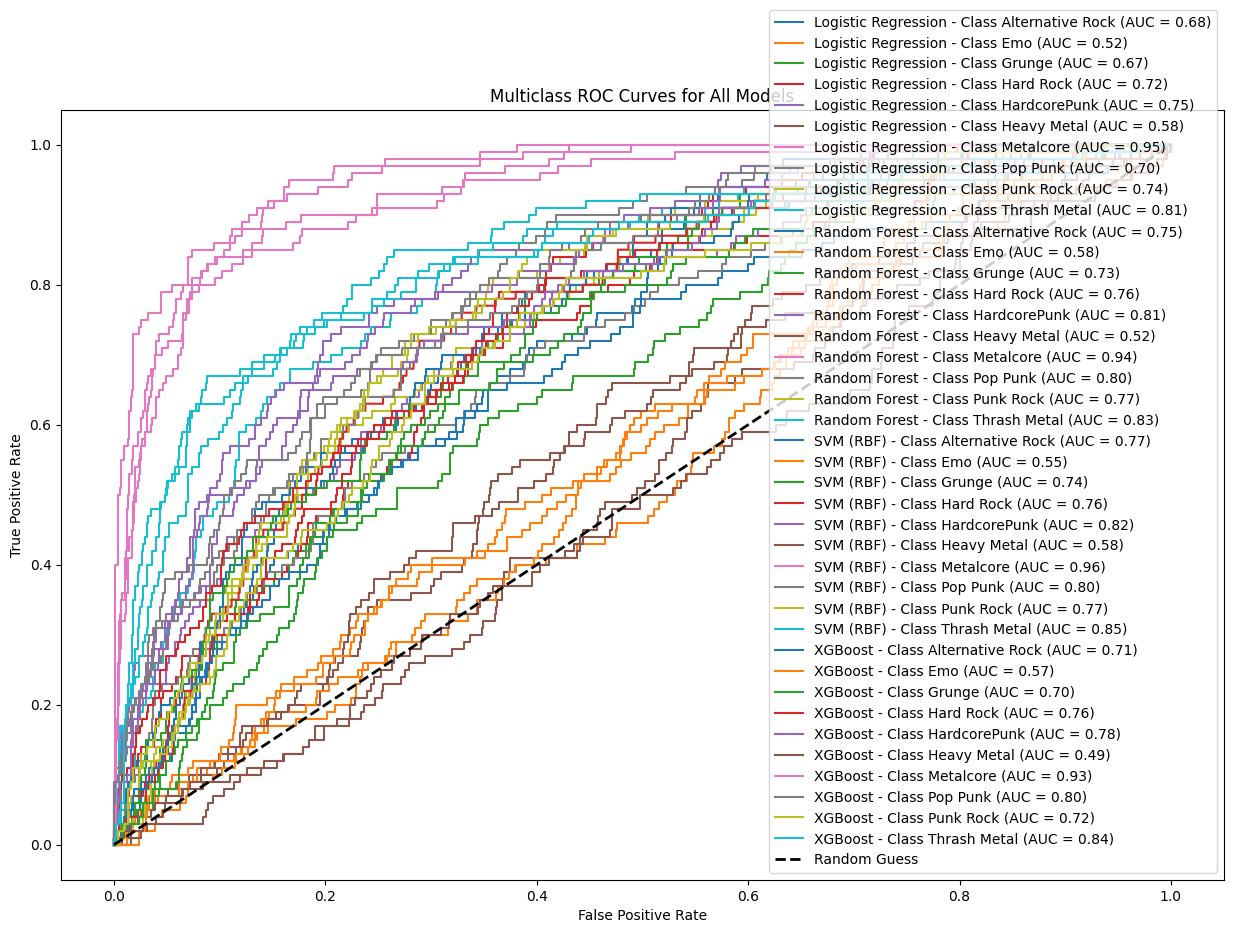

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Define function for One-vs-Rest ROC AUC and macro-averaged AUC
def analyze_multiclass_roc(models, model_names, X, y, cv):
    """
    Analyze and plot ROC AUC for multiclass models.
    
    Parameters:
    - models: List of trained models
    - model_names: List of model names
    - X: Features
    - y: Target variable (integer encoded labels)
    - cv: Cross-validation folds
    """
    # Binarize the target variable
    classes = le.classes_
    n_classes = len(classes)
    y_binarized = label_binarize(y, classes=range(n_classes))

    # Initialize plot
    plt.figure(figsize=(15, 10))
    
    for model, name in zip(models, model_names):
        # Cross-validated predictions for probabilities
        y_proba = cross_val_predict(model, X, y, cv=cv, method="predict_proba")
        
        # Calculate and plot ROC for each class
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_binarized[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} - Class {classes[i]} (AUC = {roc_auc:.2f})")
        
        # Compute macro-averaged ROC AUC
        macro_auc = roc_auc_score(y_binarized, y_proba, average="macro", multi_class="ovr")
        print(f"{name} Macro-Averaged ROC AUC: {macro_auc:.2f}")
    
    # Plot baseline
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guess")
    plt.title("Multiclass ROC Curves for All Models")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Initialize models
models = [
    LogisticRegression(max_iter=1000, multi_class='ovr', penalty='l2', random_state=42),
    RandomForestClassifier(n_estimators=500, random_state=42, min_samples_split=5),
    SVC(kernel='rbf', C=1000.0, gamma='scale', probability=True, random_state=42),
    XGBClassifier(eval_metric='mlogloss', random_state=42)
]

model_names = ["Logistic Regression", "Random Forest", "SVM (RBF)", "XGBoost"]

# Analyze ROC AUC
analyze_multiclass_roc(models, model_names, X_scaled_df, y, cv=5)
